<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sklearn
import pickle

random.seed(42)
np.random.seed(42)

Для воспроизводимости результатов. Разбиение на выборки, веса для инициализации моделей, порядок батчей при обучении (кросс-валидация) зависят от установленного сида. Фиксация конкретного числа делает операции воспроизводимыми и устраняет влияние случайности на результаты обучения.

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [280]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [281]:
df_train.head(10)

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
5          Maruti Wagon R LXI DUO BSIII  2007          96000     175000   
6                    Maruti 800 DX BSII  2001          45000       5000   
7                      Toyota Etios VXD  2011         350000      90000   
8  Ford Figo Diesel Celebration Edition  2013         200000     169000   
9       Renault Duster 110PS Diesel RxL  2014         500000      68000   

     fuel seller_type transmission         owner     mileage   engine  \
0  Diesel  Individual       Manual   First Owner   23.4 kmpl  1248 CC   
1  Diesel  Individual       Manual  Second Owner  21.14 kmpl  1498 CC   
2  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
3  Petrol  Individual       Manual   First Owner   16.1 kmpl  1298 CC   
4  Petrol  Individual       Manual   First Owner  20.14 kmpl  1197 CC   
5     LPG  Individual       Manual   First Owner  17.3 km/kg  1061 CC   
6  Petrol  Individual       Manual  Second Owner   16.1 kmpl   796 CC   
7  Diesel  Individual       Manual   First Owner  23.59 kmpl  1364 CC   
8  Diesel  Individual       Manual   First Owner   20.0 kmpl  1399 CC   
9  Diesel  Individual       Manual  Second Owner  19.01 kmpl  1461 CC   

    max_power                    torque  seats  
0      74 bhp            190Nm@ 2000rpm    5.0  
1  103.52 bhp       250Nm@ 1500-2500rpm    5.0  
2      90 bhp  22.4 kgm at 1750-2750rpm    5.0  
3    88.2 bhp     11.5@ 4,500(kgm@ rpm)    5.0  
4   81.86 bhp         113.75nm@ 4000rpm    5.0  
5    57.5 bhp      7.8@ 4,500(kgm@ rpm)    5.0  
6      37 bhp             59Nm@ 2500rpm    4.0  
7    67.1 bhp       170Nm@ 1800-2400rpm    5.0  
8    68.1 bhp            160Nm@ 2000rpm    5.0  
9  108.45 bhp            248Nm@ 2250rpm    5.0

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [282]:
# Пропуски в записях
missing_cols = df_train.columns[df_train.isnull().any()].tolist()

print("Колонки с пропусками:", missing_cols)
print(df_train.isnull().sum())

Колонки с пропусками: ['mileage', 'engine', 'max_power', 'torque', 'seats']
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64


In [283]:
# Количество дубликатов
num_duplicates = df_train.duplicated().sum()

print("Количество дубликатов в train:", num_duplicates // 2)

Количество дубликатов в train: 492


In [284]:
!pip install ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00


In [285]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")

In [286]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 25.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Выводы:

- 7% тренировочных данных являются полными дупликатами
- Цена автомобиля сильно кореллирует с *годом выпуска* и *типом коробки передач*. При этом обратная корреляция наблюдается с параметром *пробег*.
- Абсолютное большинство продавцов - физические лица, не дилеры
- Пропущенные данные преимущественно касаются технических характеристик автомобиля и сконцентрированы в одних и тех же записях, а не распределены по разным.

In [287]:
for i in range(0, len(df_train)):
  try:
    ffil_value = float(df_train.loc[i, 'max_power'][:-4])
    df_train.loc[i, 'max_power'] = ffil_value

  except:
    if df_train.loc[i, 'max_power'] in [np.nan, 'nan']:
      continue
    elif df_train.loc[i, 'max_power'] == '0':
      ffil_value = float(df_train.loc[i, 'max_power'])
      df_train.loc[i, 'max_power'] = ffil_value
    else:
      df_train.loc[i, 'max_power'] = 0


### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [288]:
# Статистики по числовым столбцам
num_desc_train = df_train.describe()
num_desc_test  = df_test.describe()

# Статистики по категориальным столбцам
cat_desc_train = df_train.describe(include=['object', 'category'])
cat_desc_test  = df_test.describe(include=['object', 'category'])

print("Числовые статистики — train:\n", num_desc_train)
print("Числовые статистики — test:\n", num_desc_test)

print("Категориальные статистики — train:\n", cat_desc_train)
print("Категориальные статистики — test:\n", cat_desc_test)


Числовые статистики — train:
               year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000
Числовые статистики — test:
               year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349

Выводы:

**Числовые признаки**:

1. Среднее и медиана по полю `year` различаются незначительно (2013.68 и 2014), то есть распределение почти симметричное
2. Среднее намного выше медианы по полю `selling_price`, т.е. присуствуют выбросы особенно дорогих автомобилей
3. Среднее и медиана по полю `seats` различаются незначительно (5 и 5.4), то есть распределение почти симметричное, скорее всего, большая часть автомобилей - легковые/седаны со стандартным числом посадочных мест.

**Категориальные признаки:**
1. Несмотря на то, что в тестовой выборке значительно меньше уникальных марок автомобилей, топы совпадают. Это нормально, т.к. тест намного меньше, и, главное, что распределение осталось тем же.
2. Наиболее частый тип - дизельные авто. Совпадает и в тесте, и в трейне.
3. Доминирует физ.лица-продавцы как в тесте, так и в трейне. Число уникальных категорий идентично.

Технические поля (`mileage`, `engine`, `max_power`, `torque`) имеют много уникальных значений, хотя являются численными по сути, их следует парсить.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [289]:
target_col = 'selling_price'
feature_cols = [col for col in df_train.columns if col != target_col]
numeric_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']
cat_cols = ['seats', 'name', 'fuel', 'seller_type', 'transmission', 'owner']

In [290]:
assert set(feature_cols) == set(numeric_cols + cat_cols), numeric_cols + cat_cols

In [291]:
duplicates_mask = df_train.duplicated(subset=feature_cols, keep=False)
n_duplicates = duplicates_mask.sum()

print(f"Количество объектов с одинаковым признаковым описанием: {n_duplicates}")
print(f"Количество уникальных групп дубликатов: {df_train[duplicates_mask].duplicated(subset=feature_cols, keep='first').sum()}")

first_dup_group = df_train[df_train.duplicated(subset=feature_cols, keep=False)].groupby(feature_cols).head(5)
print(first_dup_group.head(10))

Количество объектов с одинаковым признаковым описанием: 1799
Количество уникальных групп дубликатов: 1159
                                  name  year  selling_price  km_driven  \
22             Maruti Baleno Delta 1.2  2016         575000      45000   
26         Maruti Omni E MPI STD BS IV  2018         254999      25000   
27     Maruti Vitara Brezza LDi Option  2017         670000      70000   
29           Maruti Omni 8 Seater BSIV  2012         150000      35000   
31    Maruti Alto 800 CNG LXI Optional  2019         330000      10000   
32          Maruti Alto K10 VXI Airbag  2019         366000      15000   
33    Hyundai Verna VTVT 1.6 SX Option  2019        1149000       5000   
35        Tata Safari DICOR 2.2 LX 4x2  2011         425000      60000   
36                      Maruti 800 Std  2012         150000      76000   
37  Jeep Compass 1.4 Limited Plus BSIV  2019        2100000       5000   

      fuel seller_type transmission         owner      mileage   engine  \
22  

In [292]:
# Удаляем дубликаты
df_train_clean = df_train.drop_duplicates(subset=feature_cols, keep='first')

In [293]:
# Обновляем индекс
df_train_clean = df_train_clean.reset_index(drop=True)
df_test_clean = df_test.copy()

Скрытые дубли:
1. Разница в заполнении марки автомобиля (регистрозависимость: bmw и BMW):
  Можно исправить путем приведения к нижнему регистру
2. Пробелы, невидимые символы, разница в кодировке (отсутсвие символа в UTF-8): Можно исправить путем приведения к единой кодировке с заменой разных символов попуска на один
3. Форматы дат и времени (американская система, европейская): Парсинг в datetime с приведением к единому формату
4. Системные единицы измерения (метрическая система, имперская система): Приведение к единым системам измерения

In [294]:
assert df_train_clean.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [295]:
df_train_clean.torque

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2        22.4 kgm at 1750-2750rpm
3           11.5@ 4,500(kgm@ rpm)
4               113.75nm@ 4000rpm
                  ...            
5835              96.1Nm@ 3000rpm
5836                90Nm@ 3500rpm
5837             113.7Nm@ 4000rpm
5838    24@ 1,900-2,750(kgm@ rpm)
5839               190Nm@ 2000rpm
Name: torque, Length: 5840, dtype: object

In [296]:
import re

def preprocess_features(df: pd.DataFrame) -> pd.DataFrame:
  df = df.copy()

  # Обрабатываем расход топлива
  df['mileage'] = df['mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').str.strip()
  df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

  # Обрабатываем двигатель
  df['engine'] = df['engine'].astype(str).str.replace(' CC', '').str.strip()
  df['engine'] = pd.to_numeric(df['engine'], errors='coerce')

  # Обрабатываем макс. мощность
  df['max_power'] = df['max_power'].astype(str).str.replace(' bhp', '').str.strip()
  df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

  df['torque_value'] = np.nan
  df['max_torque_rpm'] = np.nan

  for idx, torque_str in df['torque'].items():
    if pd.isna(torque_str) or str(torque_str).strip() == '':
      continue

    # Извлекаем крутящий момент
    torque_str = str(torque_str).strip().replace(',', '')

    # Ищем крутящий момент
    torque_match = re.search(r'([\d.]+)\s*([a-z]*)\s*(nm|kgm)', torque_str, re.IGNORECASE)
    if torque_match:
      torque_val = float(torque_match.group(1))
      unit = torque_match.group(3).lower()

      if unit == 'kgm':
        torque_val = torque_val * 9.80665
      df.at[idx, 'torque_value'] = torque_val

    # Извлекаем обороты
    torque_str_clean = torque_str.replace(',', '')

    # Есть две опции: либо обороты даны как диапазон, либо как единичное число.
    # В первом случае, изем диапазон, записываем среднее
    # Во втором случае, просто записываем единичное число
    rpm_range_match = re.search(r'([\d]+)\s*[-~,]+\s*([\d]+).*?rpm', torque_str, re.IGNORECASE)
    # Диапазон
    if rpm_range_match:
      rpm1 = float(rpm_range_match.group(1))
      rpm2 = float(rpm_range_match.group(2))
      df.at[idx, 'max_torque_rpm'] = (rpm1 + rpm2) / 2
    # Единичное значение
    else:
      rpm_match = re.search(r'@\s*([\d]+)', torque_str, re.IGNORECASE)
      if rpm_match:
        df.at[idx, 'max_torque_rpm'] = float(rpm_match.group(1))
      else:
        rpm_match = re.search(r'([\d]+)\s*rpm', torque_str, re.IGNORECASE)
        if rpm_match:
          df.at[idx, 'max_torque_rpm'] = float(rpm_match.group(1))

  df = df.drop('torque', axis=1)
  df = df.rename(columns={'torque_value': 'torque'})

  return df


In [297]:
df_train = preprocess_features(df_train_clean)
df_test = preprocess_features(df_test)
numeric_cols.append('max_torque_rpm')

In [298]:
df_train[['torque', 'max_torque_rpm']]

torque  max_torque_rpm
0     190.00000          2000.0
1     250.00000          2000.0
2     219.66896          2250.0
3           NaN          4500.0
4     113.75000          4000.0
...         ...             ...
5835   96.10000          3000.0
5836   90.00000          3500.0
5837  113.70000          4000.0
5838        NaN          2325.0
5839  190.00000          2000.0

[5840 rows x 2 columns]

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [299]:
medians = {}
for col in numeric_cols + ['seats']:
    medians[col] = df_train[col].median()
    print(f"Медиана {col} (из train): {medians[col]:.2f}")

for col in numeric_cols + ['seats']:
  df_train[col].fillna(medians[col], inplace=True)
  df_test[col].fillna(medians[col], inplace=True)

Медиана year (из train): 2014.00
Медиана km_driven (из train): 70000.00
Медиана mileage (из train): 19.37
Медиана engine (из train): 1248.00
Медиана max_power (из train): 81.86
Медиана torque (из train): 160.00
Медиана max_torque_rpm (из train): 2400.00
Медиана seats (из train): 5.00


/tmp/ipython-input-3797356932.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(medians[col], inplace=True)
/tmp/ipython-input-3797356932.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [300]:
print("\nПропуски в train:")
for col in numeric_cols + ['seats']:
  missing = df_train[col].isna().sum()
  print(f"  {col}: {missing}")

print("\nПропуски в test:")
for col in numeric_cols + ['seats']:
  missing = df_test[col].isna().sum()
  print(f"  {col}: {missing}")


Пропуски в train:
  year: 0
  km_driven: 0
  mileage: 0
  engine: 0
  max_power: 0
  torque: 0
  max_torque_rpm: 0
  seats: 0

Пропуски в test:
  year: 0
  km_driven: 0
  mileage: 0
  engine: 0
  max_power: 0
  torque: 0
  max_torque_rpm: 0
  seats: 0


**Использование среднего**

Как было выяснено на этапе первичного анализа данных, ряд числовых полей имеют выбросы в большую сторону - из-за этого использование среднего заполнило бы пропуски смещенными данными.

**Заполнение медианой**

Заполнение медианой должно происходить из train, т.к. это не дает части информации просочиться из test и, к тому же, имитирует реальные условия

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [301]:
df_train["seats"] = df_train["seats"].astype(int)
df_test["seats"] = df_test["seats"].astype(int)

df_train["engine"] = df_train["engine"].astype(int)
df_test["engine"] = df_test["engine"].astype(int)

df_train["year"] = df_train["year"].astype(int)
df_test["year"] = df_test["year"].astype(int)

Как было выяснено ранее, число посадочных мест почти не превышает пяти (и имеет ограничение сверху, теоретически) - и является целым числом. Формально, его можно представить в виде порядковой категориальной переменной.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [302]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats       torque  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.892354     5.426712   171.209333     2849.720120  
std      31.661223     0.982344    82.643972      973.502561  
min       0.000000     2.000000    47.071920     1300.000000  
25%      68.000000     5.000000   112.000000     2000.000000  
50%      81.860000     5.000000   160.000000     2400.000000  
75%      99.000000     5.000000   200.000000     3750.000000  
max     400.000000    14.000000   789.000000    21800.000000

In [303]:
df_test.describe()

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        seats       torque  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000     1000.000000  
mean     90.841670     5.403000   174.858914     2894.466000  
std      34.893389     0.912921    87.916553      955.982418  
min      34.200000     4.000000    48.000000     1470.000000  
25%      69.000000     5.000000   111.795810     2125.000000  
50%      82.425000     5.000000   160.000000     2400.000000  
75%     102.000000     5.000000   205.000000     4000.000000  
max     280.000000     9.000000   620.000000     5000.000000

Да. Во-первых, экстракция полей `torque` и `rpm` могла пройти не идеально, и часть значений могла быть потеряна. Во-вторых, при заполнении медианой, мы сместили среднее.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

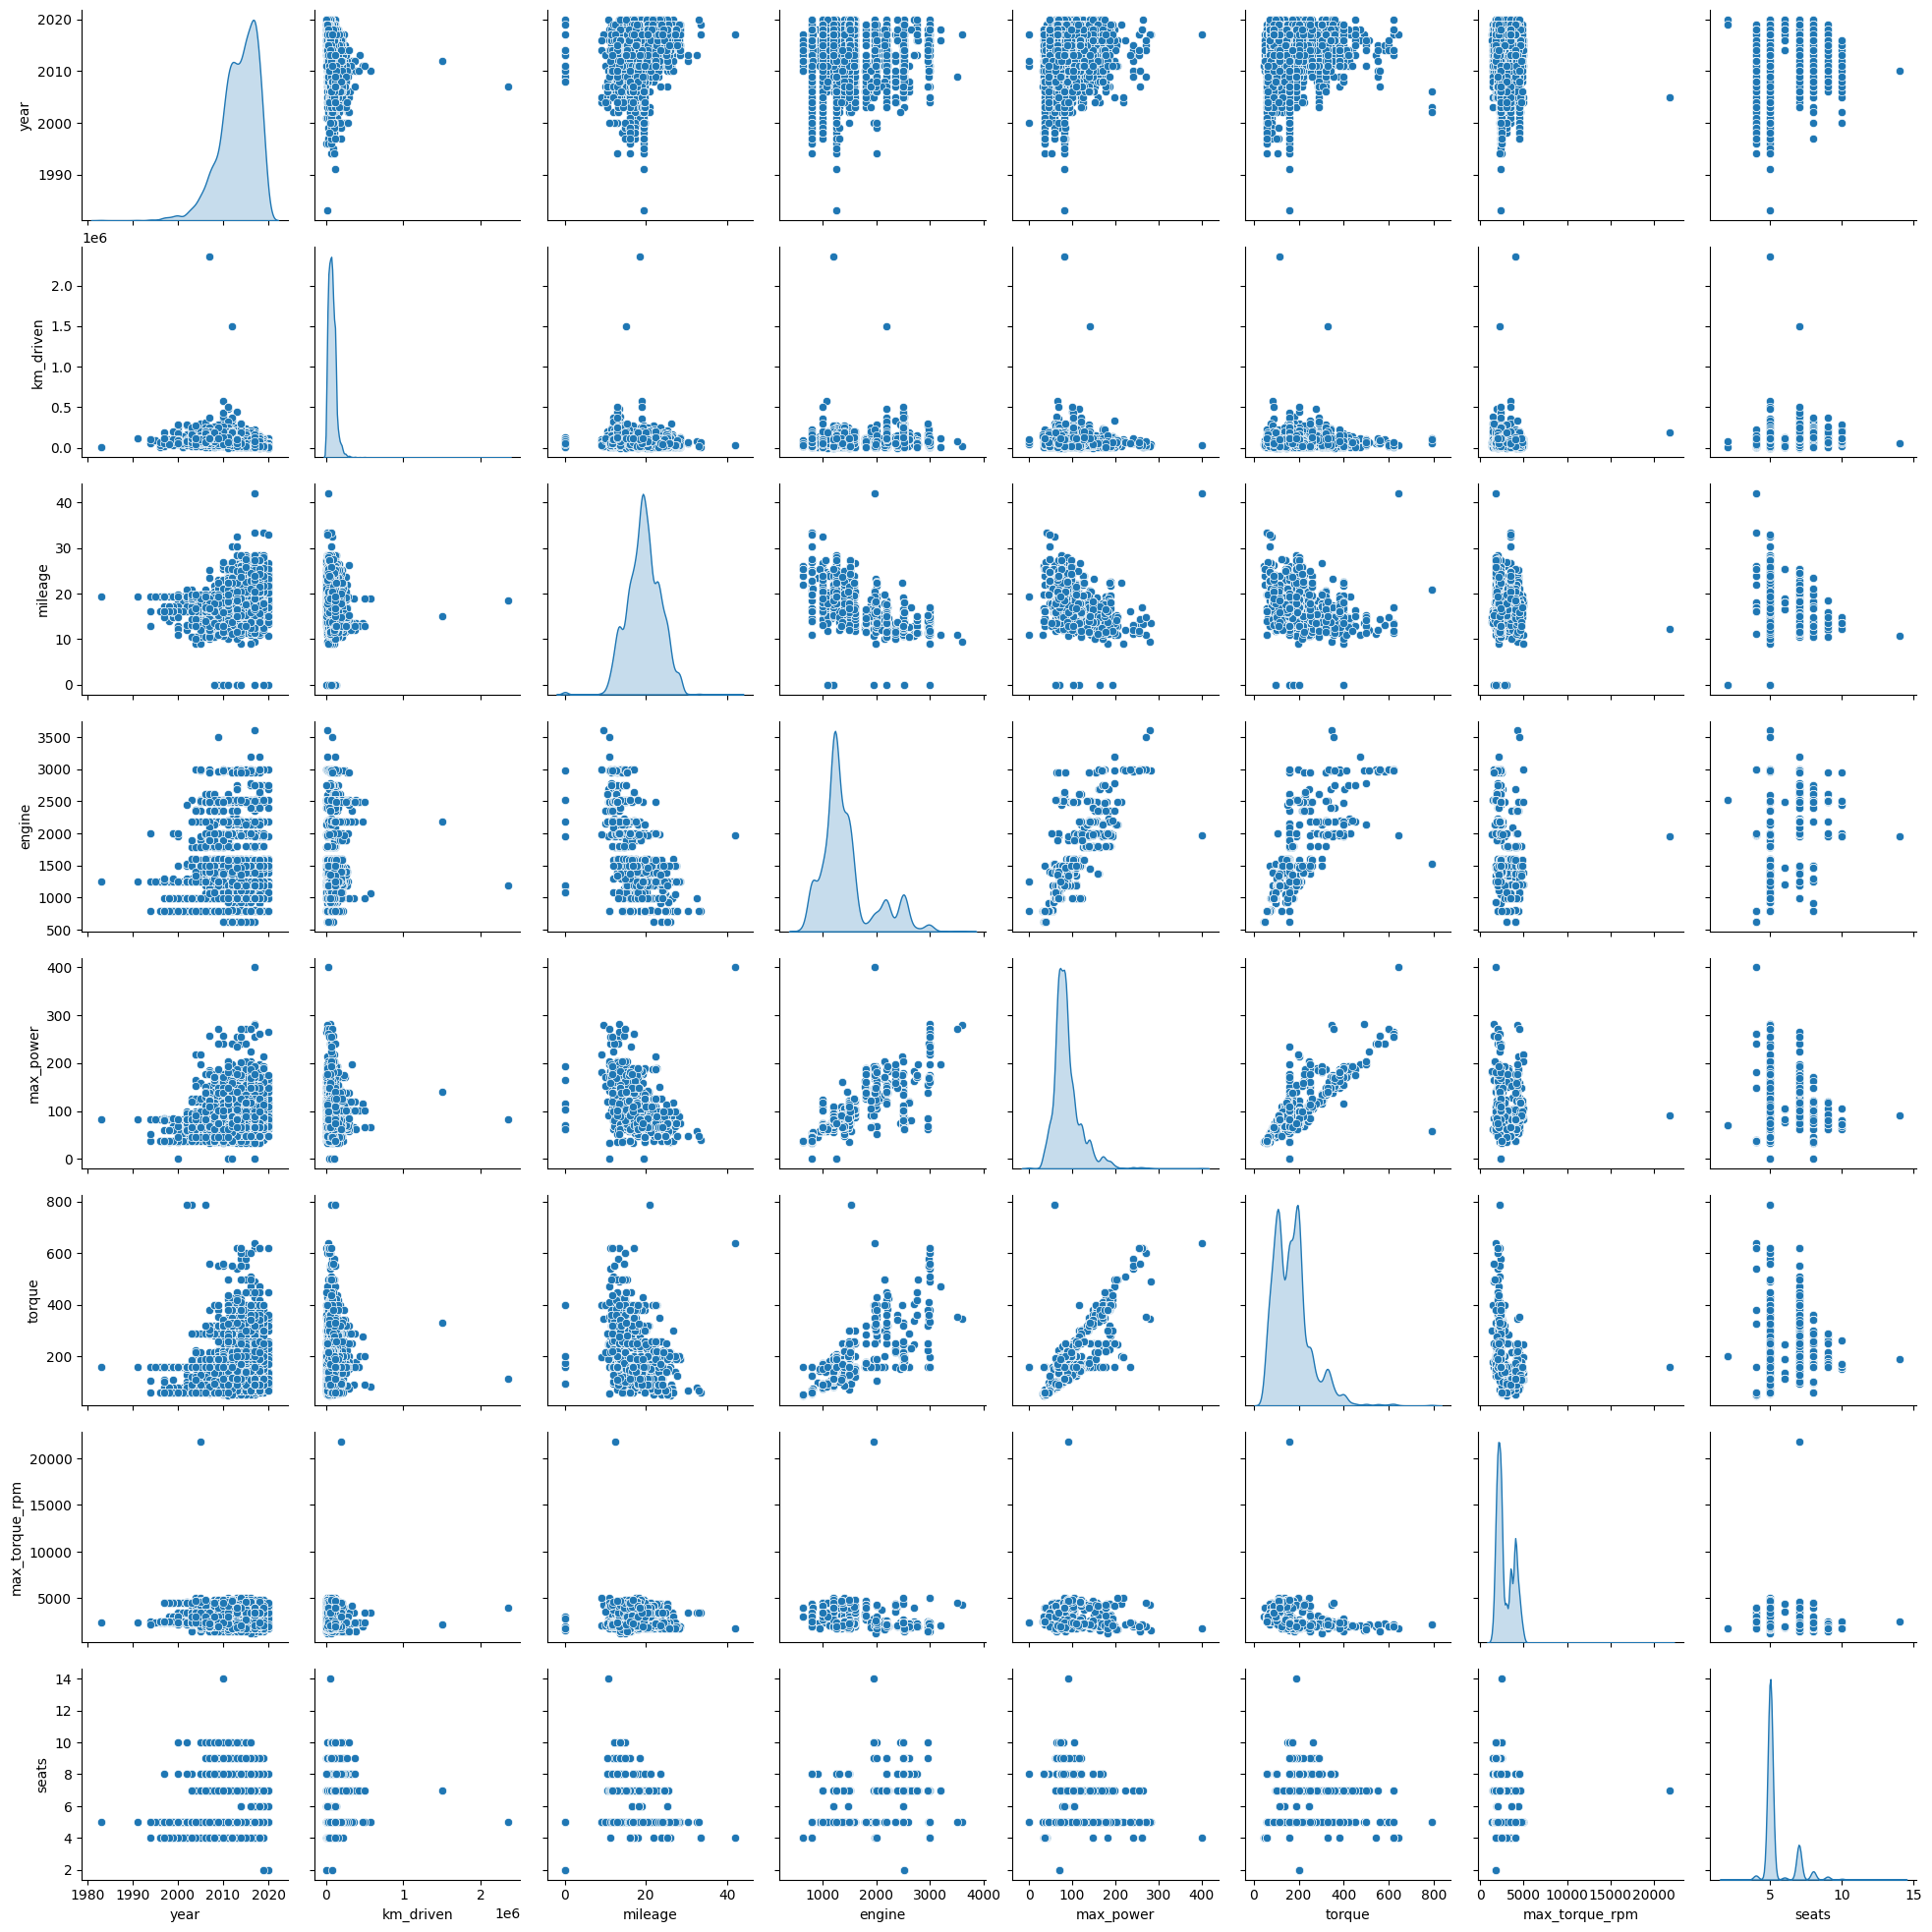

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_train[numeric_cols+['seats']], diag_kind="kde")
plt.show()

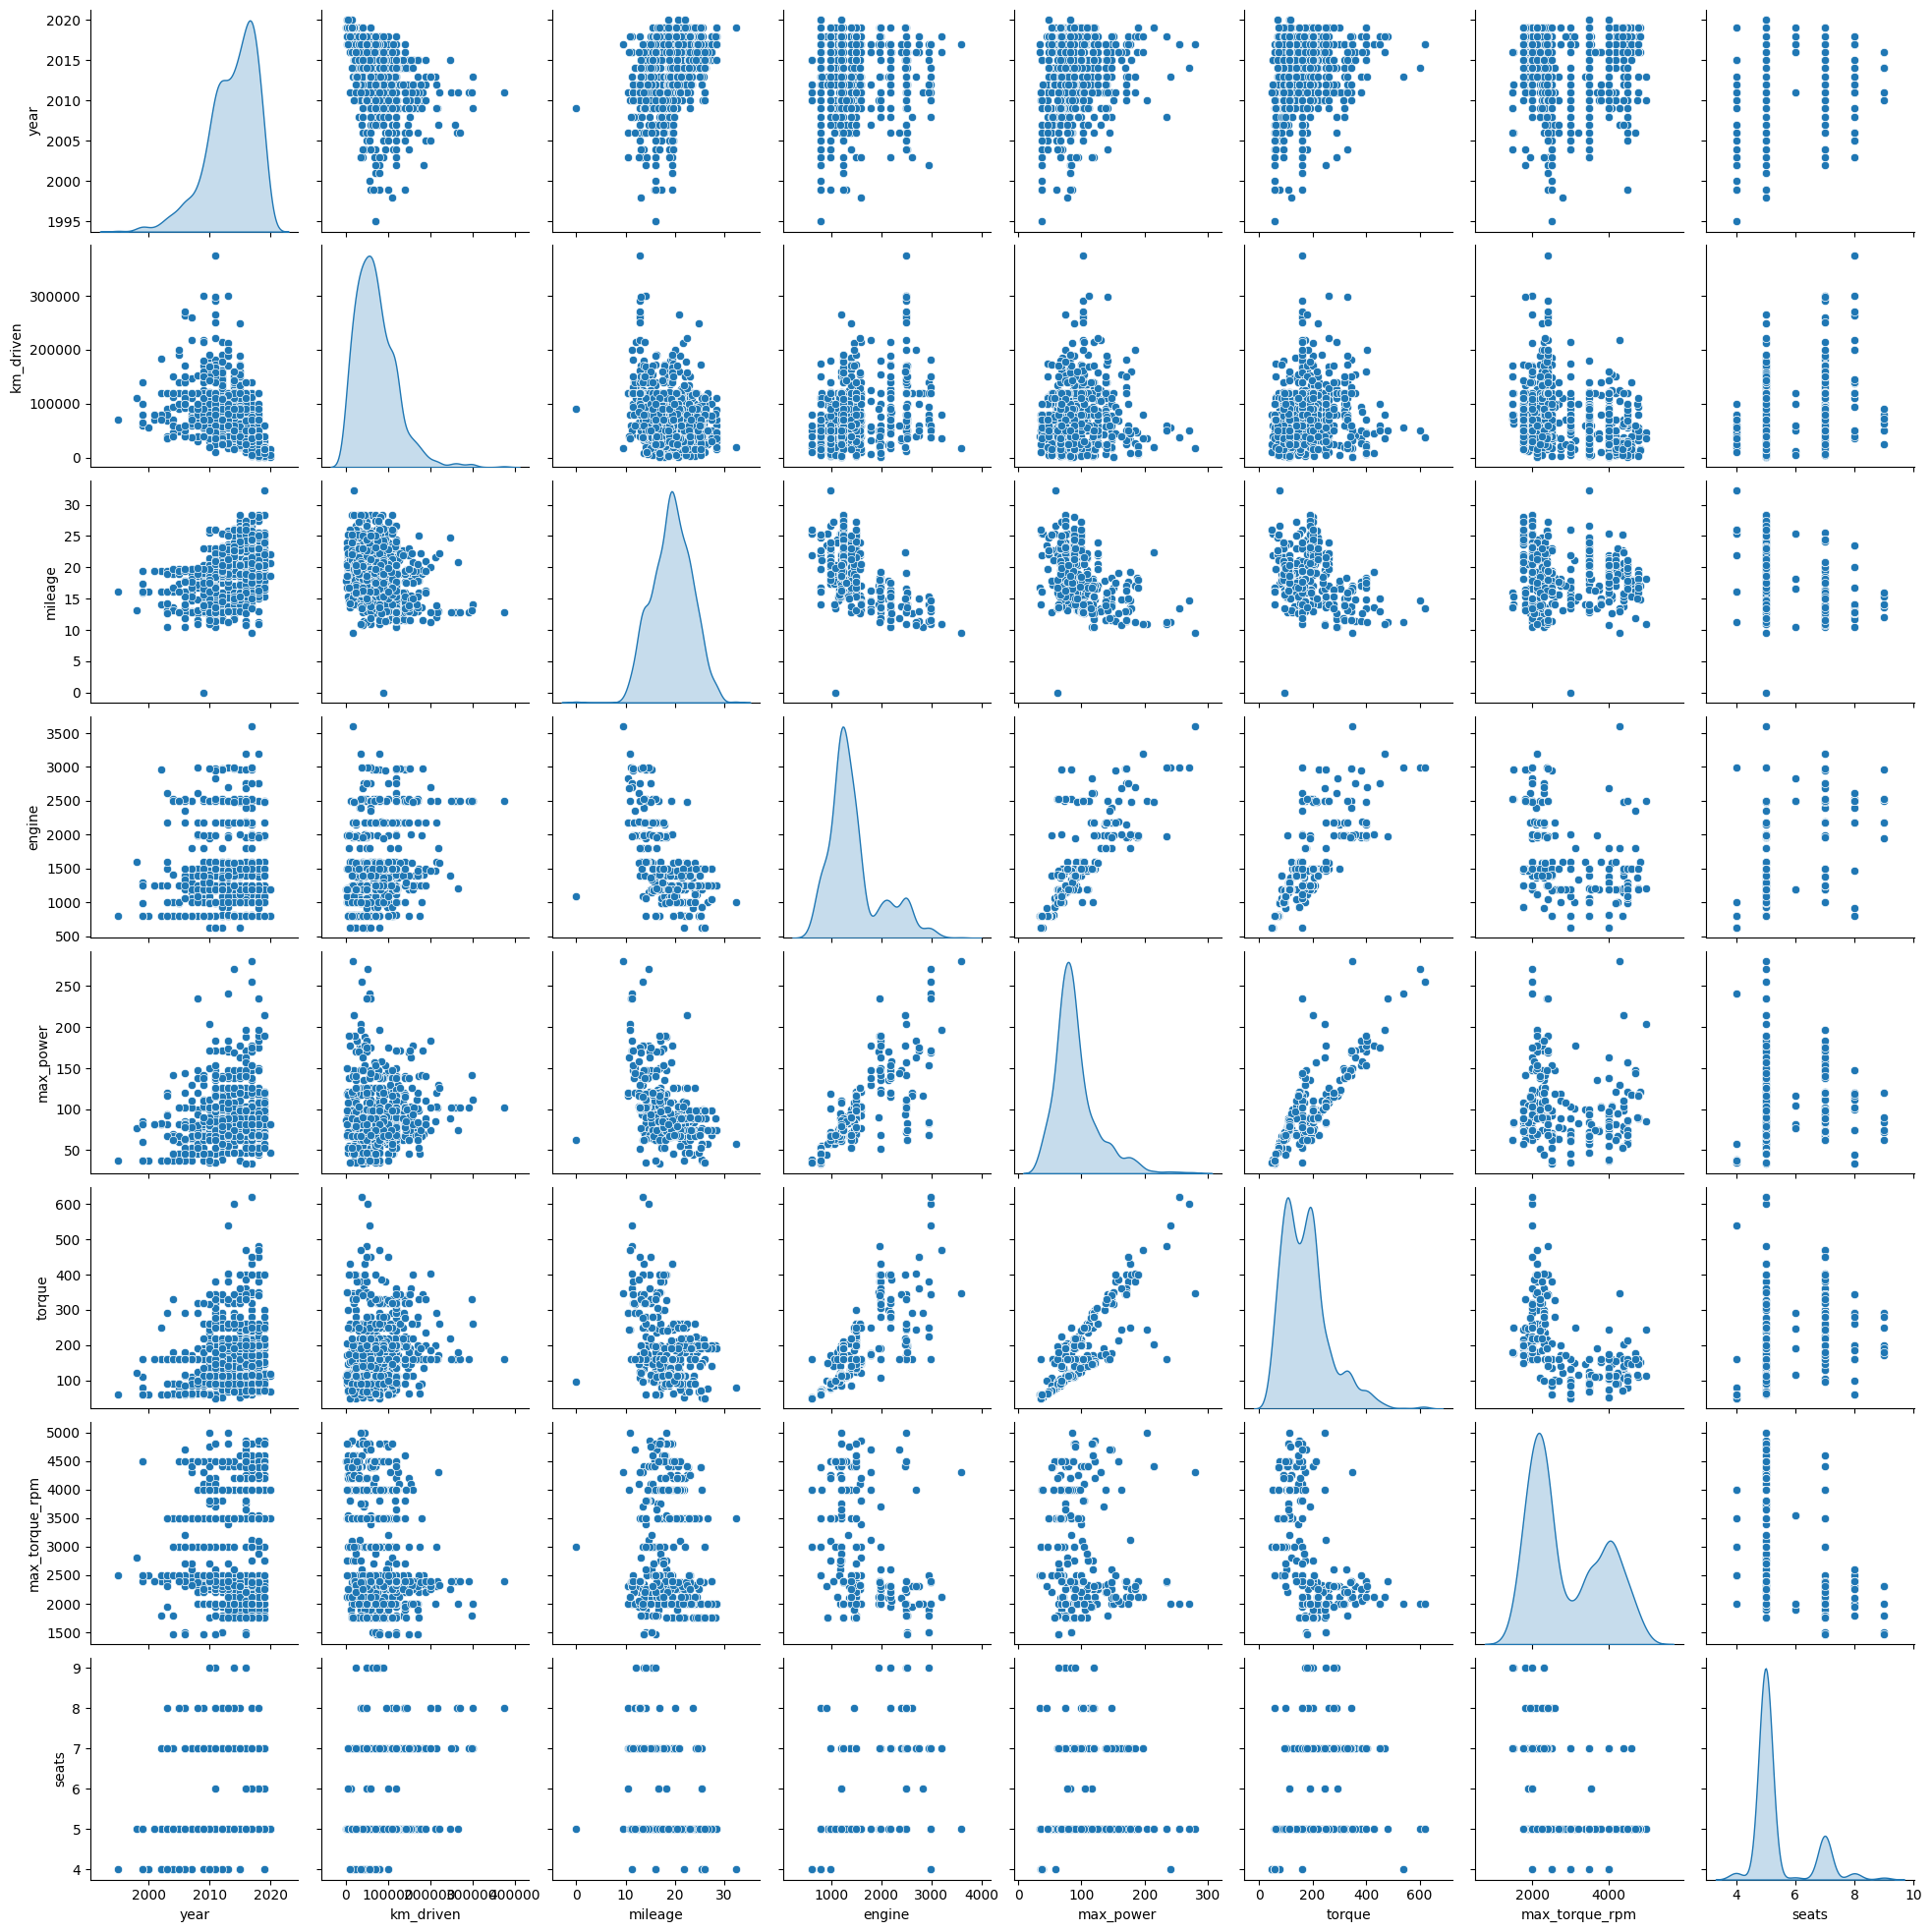

In [ ]:
sns.pairplot(df_test[numeric_cols+['seats']], diag_kind="kde")
plt.show()

**Связь с целевой переменной**

`engine`,`year`, `torque` и `max_power` имеют положительную зависимость с целевой переменной, в то время как `km_driven` имеет отрицательную. В целом, это укладывается в логику формирования цены автомобиля: более мощные, новые авто с большим кол-вом посадочных мест в среднем дороже. В то же время, чем больше пробег автомобиля, тем меньше его рыночная цена.

**Связи переменных друг с другом**

Ряд переменных имеют положительную связь, исходящую из их зависимости. Например, связь `torque` и `max_power` практически линейная, как у `engine` и `max_power`.

**Схожесть распределений**

Визуально, распределения практически идентичны вплоть до повторяющихся "пиков" в распределении `torque`. Средние значения, выясненные через describe() также совпадают, их сравнение с медианой похожее, то есть распределение такое же

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [ ]:
corr_matrix = df_train[numeric_cols+['seats']].corr(method="pearson")
corr_matrix

year  km_driven   mileage    engine  max_power    torque  \
year            1.000000  -0.368966  0.341334  0.002819   0.158207  0.130784   
km_driven      -0.368966   1.000000 -0.182086  0.229766   0.024379  0.123436   
mileage         0.341334  -0.182086  1.000000 -0.572893  -0.372197 -0.234310   
engine          0.002819   0.229766 -0.572893  1.000000   0.681247  0.721534   
max_power       0.158207   0.024379 -0.372197  0.681247   1.000000  0.819671   
torque          0.130784   0.123436 -0.234310  0.721534   0.819671  1.000000   
max_torque_rpm  0.031815  -0.231959 -0.090307 -0.385307  -0.156459 -0.558930   
seats           0.041178   0.192328 -0.451059  0.652172   0.242791  0.361590   

                max_torque_rpm     seats  
year                  0.031815  0.041178  
km_driven            -0.231959  0.192328  
mileage              -0.090307 -0.451059  
engine               -0.385307  0.652172  
max_power            -0.156459  0.242791  
torque               -0.558930  0.361590  
max_torque_rpm        1.000000 -0.297972  
seats                -0.297972  1.000000

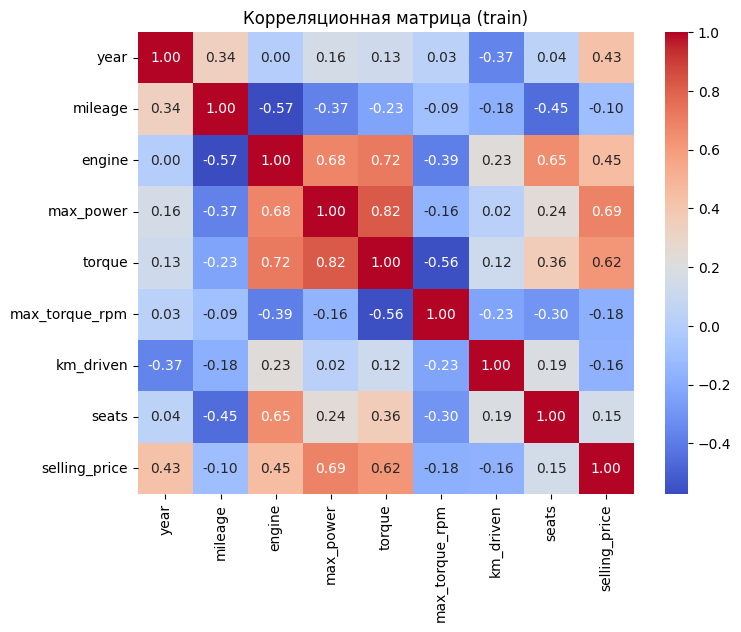

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,       # показываем числа
    cmap="coolwarm",  # цветовая схема
    fmt=".2f"         # формат чисел
)
plt.title("Корреляционная матрица (train)")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

**Наименее коррелирующие признаки:**

year — engine ≈ 0.00

year — mileage ≈ 0.00

engine — max_torque_rpm ≈ –0.39

**Наиболее коррелирующие признаки**

max_power — torque ≈ 0.82

engine — max_power ≈ 0.68

engine — torque ≈ 0.72

selling_price — max_power ≈ 0.69

**Связь года и пробега**

year — km_driven = –0.37

Т.е. корреляция значительно отрицательная, и с уменьшением кол-ва лет в использовании, пробег падает, что логично. Чем старше авто, тем больше оно проехало.

**Типы корреляций**

По умолчанию, метод использует корреляцию Пирсона. Существуют и другие, например, Спирмана и Кендалла

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [ ]:
import numpy as np

def spearman_corr(x, y):
    x = np.array(x)
    y = np.array(y)

    rx = np.argsort(np.argsort(x))
    ry = np.argsort(np.argsort(y))

    return np.corrcoef(rx, ry)[0, 1]

In [ ]:
def kendall_tau(x, y):
    x = np.array(x)
    y = np.array(y)
    n = len(x)

    concordant = 0
    discordant = 0

    for i in range(n):
        for j in range(i+1, n):
            sign_x = np.sign(x[j] - x[i])
            sign_y = np.sign(y[j] - y[i])
            prod = sign_x * sign_y

            if prod > 0:
                concordant += 1
            elif prod < 0:
                discordant += 1

    total_pairs = n * (n - 1) / 2
    return (concordant - discordant) / total_pairs

In [ ]:
import pandas as pd

x = df_train["selling_price"]
y = df_train["engine"]

print("Спирмен вручную:", spearman_corr(x, y))
print("Спирмен pandas:", x.corr(y, method="spearman"))

print("Кендал вручную:", kendall_tau(x, y))
print("Кендал pandas:", x.corr(y, method="kendall"))

Спирмен вручную: 0.46223265497675226
Спирмен pandas: 0.4635767900213014
Кендал вручную: 0.32312602786647177
Кендал pandas: 0.3342298236632781


**Выводы**

Результаты различаются, оба раза в большую сторону, но незначительно: порядка 1е-3.

При этом Спирмен отличается от Пирсона незначительно - всего на одну сотую (говорит о том, что зависимость в целом монотонная), в то время как Кендалл значительно меньше (более "строгое" правило).

In [ ]:
from phik import report

report.correlation_report(df_train)

Результаты остались в целом идентичны

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

In [ ]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [305]:
df_num = df_train.copy()
df_num_test = df_test.copy()

# Удаляем все категориальные признаки
df_num = df_num[numeric_cols + ['selling_price']]
df_num_test = df_num_test[numeric_cols+['selling_price']]

df_num.head(10)

year  km_driven  mileage  engine  max_power     torque  max_torque_rpm  \
0  2014     145500    23.40    1248      74.00  190.00000          2000.0   
1  2014     120000    21.14    1498     103.52  250.00000          2000.0   
2  2010     127000    23.00    1396      90.00  219.66896          2250.0   
3  2007     120000    16.10    1298      88.20  160.00000          4500.0   
4  2017      45000    20.14    1197      81.86  113.75000          4000.0   
5  2007     175000    17.30    1061      57.50  160.00000          4500.0   
6  2001       5000    16.10     796      37.00   59.00000          2500.0   
7  2011      90000    23.59    1364      67.10  170.00000          2100.0   
8  2013     169000    20.00    1399      68.10  160.00000          2000.0   
9  2014      68000    19.01    1461     108.45  248.00000          2250.0   

   selling_price  
0         450000  
1         370000  
2         225000  
3         130000  
4         440000  
5          96000  
6          45000  
7         350000  
8         200000  
9         500000

In [306]:
from sklearn.model_selection import train_test_split

y_train = df_num["selling_price"]
X_train = df_num.drop(columns=["selling_price"])

In [307]:
assert X_train.shape == (5840, 7), f'Got {X_train.shape}'

In [308]:
y_test = df_num_test["selling_price"]
X_test = df_num_test.drop(columns=['selling_price'])

In [309]:
assert X_test.shape == (1000, 7), f'Got {X_test.shape}'

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [310]:
def print_results(y_pred, y_true, title: str):
  print(f'=== {title} ===')
  print(f'\tR²:, {r2_score(y_true, y_pred):.4f}')
  print(f'\tMSE: {MSE(y_true, y_pred):.4f}')

In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

# делаем предсказания
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# считаем метрики
print_results(y_pred_train, y_train, 'TRAIN')
print_results(y_pred_test, y_test, 'TEST')

=== TRAIN ===
	R²:, 0.6006
	MSE: 114472752985.9308
=== TEST ===
	R²:, 0.5954
	MSE: 232567783033.0819


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [312]:
def r2_manual(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)

    return 1 - ss_res / ss_tot

r2_manual_value = r2_manual(y_test, y_pred_test)
r2_sklearn_value = r2_score(y_test, y_pred_test)

print("R² вручную:", r2_manual_value)
print("R² sklearn:", r2_sklearn_value)

R² вручную: 0.5954136572516373
R² sklearn: 0.5954136572516373


Формула выглядит следующим образом:

R² = 1 - (SSres/SStot)

где

SSres (сумма квадратов остатков) - показывает, насколько предсказания далеки от фактических значений


SStot (общая сумма квадратов отклонений) - показывает, насколько высока разница по сравнению со средним значением

То есть, это единица минус отношение ошибки модели к вариации данных

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [313]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [314]:
r2_manual_value = r2_manual(y_test, y_pred_test)
n, p = X_test.shape
r2_adjusted = adjusted_r2(r2_manual_value, n, p)

print(f"Adjusted-R²: {r2_adjusted}")

Adjusted-R²: 0.5925587133007919


Проблема R^2 заключается в том, что он растет при добавлении новых признаков, в то время как adjusted R^2 растет лишь в том случае, если новый признак привносит вклад в предсказательную способность модели. Применяется в случае, если модель имеел множество параметров.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [315]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [316]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Делаем предсказания
y_pred_train_scaled = model_scaled.predict(X_train_scaled)
y_pred_test_scaled  = model_scaled.predict(X_test_scaled)

# Считаем метрики
r2_train_scaled = r2_score(y_train, y_pred_train_scaled)
r2_test_scaled  = r2_score(y_test, y_pred_test_scaled)

mse_train_scaled = MSE(y_train, y_pred_train_scaled)
mse_test_scaled  = MSE(y_test, y_pred_test_scaled)

print_results(y_pred_train_scaled, y_train, 'TRAIN')
print_results(y_pred_test_scaled, y_test, 'TEST')

=== TRAIN ===
	R²:, 0.6006
	MSE: 114472752985.9306
=== TEST ===
	R²:, 0.5954
	MSE: 232567783033.0834


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [317]:
coefficients = model_scaled.coef_

# Названия признаков
feature_names = X_train.columns


coef_df = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': coefficients,
    'Абсолютное значение': np.abs(coefficients)
}).sort_values(by='Абсолютное значение', ascending=False)

coef_df

Признак    Коэффициент  Абсолютное значение
4       max_power  301691.290724        301691.290724
0            year  157501.889561        157501.889561
5          torque   57071.685769         57071.685769
1       km_driven  -51342.326006         51342.326006
6  max_torque_rpm  -38887.425131         38887.425131
3          engine  -13352.526343         13352.526343
2         mileage   -4701.816059          4701.816059

Наиболее информативным оказался признак `max_power`, то есть макс. мощность двигателя

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [318]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

y_pred_train_lasso = lasso_model.predict(X_train_scaled)
y_pred_test_lasso  = lasso_model.predict(X_test_scaled)

print_results(y_pred_train_lasso, y_train, 'TRAIN')
print_results(y_pred_test_lasso, y_test, 'TEST')

=== TRAIN ===
	R²:, 0.6006
	MSE: 114472753009.8295
=== TEST ===
	R²:, 0.5954
	MSE: 232568290388.1227


In [319]:
lasso_coefficients = lasso_model.coef_

feature_names = X_train.columns

coef_df_lasso = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент Lasso': lasso_coefficients
})

zero_coef_count = (np.abs(lasso_coefficients) < 1e-4).sum()

coef_df_lasso

Признак  Коэффициент Lasso
0            year      157499.459795
1       km_driven      -51341.969966
2         mileage       -4696.079143
3          engine      -13344.351887
4       max_power      301688.886460
5          torque       57070.461760
6  max_torque_rpm      -38883.657783

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [320]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'alpha': np.logspace(-4, 0, 50) # коэффициент регуляризации в формуле потерь Lasso
}

lasso = Lasso(random_state=42, max_iter=10000)

grid_search_lasso = GridSearchCV(
    estimator=lasso, # Колбэк с моделью
    param_grid=param_grid,  # Пространство значений гиперпараметра, которое перебирается поиском
    cv=10, # Число фолдов
    scoring='r2', # Эстиматор, по сути, метрика качества модели, по которой оценивается результат перебор
    n_jobs=-1 # Сколько ядер использоваь
)

grid_search_lasso.fit(X_train_scaled, y_train)

best_lasso_model = grid_search_lasso.best_estimator_
y_pred_train_cv = best_lasso_model.predict(X_train_scaled)
y_pred_test_cv = best_lasso_model.predict(X_test_scaled)

print(f"Лучший коэффициент регуляризации (alpha): {grid_search_lasso.best_params_['alpha']:.6f}")
print(f"Лучшее среднее R² на кросс-валидации: {grid_search_lasso.best_score_:.4f}")
print(f"Лучшее среднее MSE на: {grid_search_lasso.best_score_:.4f}")

Лучший коэффициент регуляризации (alpha): 1.000000
Лучшее среднее R² на кросс-валидации: 0.5734
Лучшее среднее MSE на: 0.5734


In [321]:
print_results(y_pred_train_cv, y_train, 'TRAIN')
print_results(y_pred_test_cv, y_test, 'TEST')

=== TRAIN ===
	R²:, 0.6006
	MSE: 114472753009.8295
=== TEST ===
	R²:, 0.5954
	MSE: 232568290388.1227


Грид-сёрч обучает модель для каждой комбинации параметров в сетке, умноженной на количество фолдов кросс-валидации. В нашем случае это 50*10=500

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [322]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid_en = {
    'alpha': np.logspace(-4, 0, 50),
    'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]
}

elastic_net = ElasticNet(random_state=42, max_iter=10000)

grid_search_en = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid_en,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

grid_search_en.fit(X_train_scaled, y_train)

best_en_model = grid_search_en.best_estimator_
y_pred_num = best_en_model.predict(X_test_scaled)
r2_test_en = r2_score(y_test, y_pred_num)


print(f"Лучшие гиперпараметры: {grid_search_en.best_params_}")
print(f"Лучшее среднее R² на кросс-валидации: {grid_search_en.best_score_:.4f}")
print(f"R² на тестовом наборе {r2_test_en:.4f}")

Лучшие гиперпараметры: {'alpha': np.float64(0.6866488450042998), 'l1_ratio': 0.75}
Лучшее среднее R² на кросс-валидации: 0.5805
R² на тестовом наборе 0.5645


In [323]:
y_pred_test_en = best_en_model.predict(X_test_scaled)
y_pred_train_en = best_en_model.predict(X_train_scaled)

print_results(y_pred_train_en, y_train, 'TRAIN')
print_results(y_pred_test_en, y_test, 'TEST')

=== TRAIN ===
	R²:, 0.5913
	MSE: 117146037138.5839
=== TEST ===
	R²:, 0.5645
	MSE: 250358560438.4439


Аналогично, число обучаемых моделей равно количеству параметров, умноженному на число фолдов. В нашем случае: 50 х 5 х 10 = 2500

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [ ]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [352]:
def extract_brand(df):
    """Извлекает первое слово из столбца 'name' и создает новый столбец 'brand'."""
    # Используем str.split() и берем первый элемент [0]
    df = df.copy()

    df['brand'] = df['name'].astype(str).apply(lambda x: x.split(' ')[0])
    df = df.drop(columns=['name'], axis=1)
    return df

X_train_cat = extract_brand(df_train)
X_test_cat = extract_brand(df_test)

In [353]:
cat_cols.remove('name')
cat_cols.append('brand')

In [354]:
X_train_cat.brand.nunique()

30

In [355]:
X_train_cat.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats       torque  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.892354     5.426712   171.209333     2849.720120  
std      31.661223     0.982344    82.643972      973.502561  
min       0.000000     2.000000    47.071920     1300.000000  
25%      68.000000     5.000000   112.000000     2000.000000  
50%      81.860000     5.000000   160.000000     2400.000000  
75%      99.000000     5.000000   200.000000     3750.000000  
max     400.000000    14.000000   789.000000    21800.000000

In [356]:
y_train_cat = X_train_cat['selling_price']
X_train_cat = X_train_cat.drop(columns=['selling_price'], axis=1)

y_test_cat = X_test_cat['selling_price']
X_test_cat = X_test_cat.drop(columns=['selling_price'], axis=1)

In [357]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner   brand
count     5840        5840         5840         5840    5840
unique       4           3            2            5      30
top     Diesel  Individual       Manual  First Owner  Maruti
freq      3177        5223         5336         3603    1804

In [358]:
assert X_train_cat.shape == (5840, 13), X_train_cat.shape

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [359]:
cat_cols = X_train_cat.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_train_cat.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [360]:
cat_cols += ['seats']

In [361]:
numeric_cols.remove('seats')

In [362]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('scale', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'
)
preprocess.fit(X_train_cat)

X_train_ohe = preprocess.transform(X_train_cat)
X_test_ohe = preprocess.transform(X_test_cat)

In [363]:
X_test_ohe.shape

(1000, 60)

In [364]:
preprocess['cat'].get_feature_names_out()

array(['fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'brand_Ambassador',
       'brand_Audi', 'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo',
       'brand_Datsun', 'brand_Fiat', 'brand_Force', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar',
       'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_Lexus', 'brand_MG',
       'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_Peugeot',
       'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota',
       'brand_Volkswagen', 'brand_Volvo', 'seats_2', 'seats_4', 'seats_5',
       'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14'],
      dtype=o

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

1. Изначально, надо сделать fit_predict на обучающей выборке, и только fit на тестовой, т.к. в ней могут быть категории, отсутствующие во второй.
2. Для избегания линейной зависимости между признаками, так как в таком случае, сумма всех созданных столбцов равна 1. Убрав один из столбцов, мы можем идентифицровать пропущенную категорию как 0 во всех остальных, и, при этом, убрать мультиколлинеарность.
3. Можно, т.к. каждый ohe-столбец это бинарный признак, но надо учитывать, что это потребует пересоздания модели (инференс на текущей, где есть вес для этого признака, будет невозможен)

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [365]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error as MSE

param_grid_ridge = {
    'alpha': np.logspace(-4, 4, 100)
}

ridge = Ridge(random_state=42)

grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

grid_search_ridge.fit(X_train_ohe, y_train_cat)

best_ridge_model = grid_search_ridge.best_estimator_

y_pred_test_ridge_cat = best_ridge_model.predict(X_test_ohe)
y_pred_train_ridge_cat = best_ridge_model.predict(X_train_ohe)
r2_test_ridge = r2_score(y_test_cat, y_pred_test_ridge_cat)
r2_adjusted = adjusted_r2(r2_test_ridge, X_test_ohe.shape[0], X_test_ohe.shape[1])

print(f"Лучший коэффициент регуляризации (alpha): {grid_search_ridge.best_params_['alpha']:.6f}")
print(f"Лучшее среднее R² на кросс-валидации (train): {grid_search_ridge.best_score_:.4f}")
print(f'Adjusted-R² на тестовом наборе (Ridge): {r2_adjusted:.4f}')

print_results(y_pred_train_ridge_cat, y_train, 'TRAIN')
print_results(y_pred_test_ridge_cat, y_test, 'TEST')

Лучший коэффициент регуляризации (alpha): 1.917910
Лучшее среднее R² на кросс-валидации (train): 0.7168
Adjusted-R² на тестовом наборе (Ridge): 0.7662
=== TRAIN ===
	R²:, 0.7729
	MSE: 65090973527.4769
=== TEST ===
	R²:, 0.7802
	MSE: 126343314241.2675


Метрика adjusted-r^2 выросла, что говорит об улучшении качества модели, MSE в свою очередь уменьшилась.

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Изначально я написал модель без использования Pipeline, но получилось так, что при генерации ряда признаков, надо сохранять состояния train'a (например, когда ищешь выбросы), и поэтому пришлось перейти на такую архитектуру.

---



In [366]:


from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import re
import numpy as np


class TechFieldsTransformer(BaseEstimator, TransformerMixin):
    """ Реализует приведение технических полей к единому формату. """
    def fit(self, X, y=None):
        X = self.transform(X)
        return self

    def transform(self, X):
        df = X.copy()

        df['brand'] = df['name'].astype(str).apply(lambda x: x.split(' ')[0])
        df = df.drop('name', axis=1)

        df['mileage'] = (
            df['mileage']
            .astype(str)
            .str.replace(' kmpl', '')
            .str.replace(' km/kg', '')
            .str.strip()
        )
        df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

        df['engine'] = (
            df['engine']
            .astype(str)
            .str.replace(' CC', '')
            .str.strip()
        )
        df['engine'] = pd.to_numeric(df['engine'], errors='coerce')

        df['max_power'] = (
            df['max_power']
            .astype(str)
            .str.replace(' bhp', '')
            .str.strip()
        )
        df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

        # torque parsing
        df['torque_value'] = np.nan
        df['max_torque_rpm'] = np.nan

        for idx, torque_str in df['torque'].items():
            if pd.isna(torque_str):
                continue

            torque_str = str(torque_str).strip().replace(',', '')

            # numeric torque value
            torque_match = re.search(r'([\d.]+)\s*([a-z]*)\s*(nm|kgm)', torque_str, re.IGNORECASE)
            if torque_match:
                torque_val = float(torque_match.group(1))
                unit = torque_match.group(3).lower()

                if unit == 'kgm':
                    torque_val *= 9.80665

                df.at[idx, 'torque_value'] = torque_val

            # rpm
            rpm_range_match = re.search(r'([\d]+)\s*[-~,]+\s*([\d]+).*?rpm', torque_str, re.IGNORECASE)
            if rpm_range_match:
                rpm1 = float(rpm_range_match.group(1))
                rpm2 = float(rpm_range_match.group(2))
                df.at[idx, 'max_torque_rpm'] = (rpm1 + rpm2) / 2
            else:
                rpm_match = re.search(r'@\s*([\d]+)', torque_str)
                if rpm_match:
                    df.at[idx, 'max_torque_rpm'] = float(rpm_match.group(1))
                else:
                    rpm_match = re.search(r'([\d]+)\s*rpm', torque_str)
                    if rpm_match:
                        df.at[idx, 'max_torque_rpm'] = float(rpm_match.group(1))

        df = df.drop('torque', axis=1)

        df = df.rename(columns={
            'torque_value': 'torque'
        })

        return df

class FeatureEngineeringGenerator(BaseEstimator, TransformerMixin):
  def __init__(self, factor=1.5):
        self.potential_outliers = ['km_driven', 'mileage', 'engine', 'max_power', 'torque', 'year', 'seats', 'torque',  'max_torque_rpm']
        self.factor = factor
        self.bounds_ = {}

  def fit(self, X, y=None):
        for col in self.potential_outliers:
            q1 = X[col].quantile(0.25)
            q3 = X[col].quantile(0.75)
            iqr = q3 - q1
            self.bounds_[col] = (q1 - self.factor*iqr, q3 + self.factor*iqr)
        return self

  def transform(self, X):
    df = X.copy()

    # Размечаем выбросы
    for col, (low, high) in self.bounds_.items():
        df[col + '_outlier'] = ((df[col] < low) | (df[col] > high)).astype(int)

    # Применяем логарифм к вещественным признакам
    loggable = ["km_driven", "mileage", "engine", "max_power", "torque"]
    for col in loggable:
      if col in df.columns:
        df[f"log_{col}"] = np.log1p(df[col].replace(0, 1e-9))
        df = df.drop(col, axis =1)

    # Добавляем признак мощности на литр
    if all(c in df.columns for c in ["max_power", "engine"]):
      df["power_per_liter"] = df["max_power"] / df["engine"]

    # Добавляем средний пробег в год
    if "km_driven" in df.columns and "year" in df.columns:
      current_year = df["year"].max()+1
      df["km_per_year"] = df["km_driven"] / (current_year - df["year"] + 1)

    if "engine" in df.columns and "mileage" in df.columns:
      df["engine_x_mileage"] = df["engine"] * df["mileage"]

    return df

# Суть в том, чтобы заполнять не просто медианой по абсолютно всей выборке, а по более узкой категории: например, медианой в рамках
# конкретной марки автомобиля с определенным типом двигателя. Если таких нет, заполняем медианой по всей выборке.
class HierarchicalImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_fill):
        self.columns_to_fill = columns_to_fill
        self.medians_ = {}

    def fit(self, X, y=None):
        self.medians_ = {}
        for col, groups_list in self.columns_to_fill.items():
            self.medians_[col] = []
            for group_cols in groups_list:
                if group_cols:
                    medians = X.groupby(group_cols)[col].median()
                    self.medians_[col].append((group_cols, medians))
                else:
                    median_val = X[col].median()
                    self.medians_[col].append(([], median_val))
        return self

    def transform(self, X):
        X = X.copy()
        for col, groups_medians in self.medians_.items():
            for group_cols, medians in groups_medians:
                if group_cols:
                    X[col] = X.apply(
                        lambda row: medians.get(tuple(row[c] for c in group_cols), row[col])
                        if pd.isna(row[col]) else row[col],
                        axis=1
                    )
                else:
                    X[col] = X[col].fillna(medians)
        return X

In [367]:
def fill_nas(df):
  df_filled = df.copy()
    # Колонки для заполнения и их приоритетные группировки
  columns_to_fill = {
        'seats': [['brand', 'fuel'], ['brand'], []],
        'mileage': [['brand', 'fuel'], ['brand'], []],
        'engine': [['brand', 'fuel'], ['brand'], []],
        'max_power': [['brand', 'fuel'], ['brand'], []],
        'torque': [['brand', 'fuel'], ['brand'], []],
        'max_torque_rpm': [['brand', 'fuel'], ['fuel'], []]
  }

  for col, groups_list in columns_to_fill.items():
    for group_cols in groups_list:
      if group_cols:  # если список группировок не пустой
        df_filled[col] = df_filled.groupby(group_cols)[col].transform(
          lambda x: x.fillna(x.median())
        )
      else:
        df_filled[col] = df_filled[col].fillna(df_filled[col].median())

  return df_filled

In [368]:
X_train, y_train = df_train_clean.drop(columns=['selling_price'], axis=1), df_train['selling_price']
X_test, y_test = df_test_clean.drop(columns=['selling_price'], axis=1), df_test['selling_price']

In [369]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

numeric = [
    'year',
    'max_torque_rpm',
    'year_outlier',
    'km_driven_outlier',
    'mileage_outlier',
    'engine_outlier',
    'max_power_outlier',
    'seats_outlier',
    'torque_outlier',
    'max_torque_rpm_outlier',
    'log_km_driven',
    'log_mileage',
    'log_engine',
    'log_max_power',
    'log_torque']

categorical = [
    'fuel',
    'seller_type',
    'transmission',
    'owner',
    'brand',
    'seats'
]

columns_to_fill = {
    'seats': [['brand', 'fuel'], ['brand'], []],
    'mileage': [['brand', 'fuel'], ['brand'], []],
    'engine': [['brand', 'fuel'], ['brand'], []],
    'max_power': [['brand', 'fuel'], ['brand'], []],
    'torque': [['brand', 'fuel'], ['brand'], []],
    'max_torque_rpm': [['brand', 'fuel'], ['fuel'], []]
}

potential_outliers = ['km_driven', 'mileage', 'engine', 'max_power', 'torque', 'year', 'seats', 'torque', 'max_torque_rpm']

categorical_ohe = OneHotEncoder(handle_unknown="ignore")

numeric_poly = Pipeline([
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_poly, numeric),
        ("cat", categorical_ohe, categorical)
    ],
    remainder="drop"
)

pipeline = Pipeline([
    ("convert_tech_fields", TechFieldsTransformer()),
    ("impute", HierarchicalImputer(columns_to_fill)),
    ("add_features", FeatureEngineeringGenerator()),
    ("preprocess", preprocess),
    ("ridge", Ridge())
])

In [370]:
poly_ridge_params = {
    'preprocess__num__poly__degree': [1, 2],
    'ridge__alpha': [0.1, 1, 5, 10, 50, 75, 90, 100]
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=poly_ridge_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Лучший набор параметров:", grid.best_params_)

y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

print_results(y_pred_train, y_train, 'TRAIN')
print_results(y_pred_test, y_test, 'TEST')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Лучший набор параметров: {'preprocess__num__poly__degree': 2, 'ridge__alpha': 50}
=== TRAIN ===
	R²:, 0.8796
	MSE: 34511062607.5383
=== TEST ===
	R²:, 0.8965
	MSE: 59497912326.3095


In [371]:
import joblib

joblib.dump(best_model, "model_new.pkl")

['model_new.pkl']

In [372]:
model = best_model

preprocess = model.named_steps["preprocess"]
num_pipeline = preprocess.named_transformers_["num"]
poly = num_pipeline.named_steps["poly"]

num_features = preprocess.transformers_[0][2]
poly_num_features = poly.get_feature_names_out(num_features)
cat_features = preprocess.named_transformers_["cat"].get_feature_names_out()
feature_names = list(poly_num_features) + list(cat_features)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [373]:
def business_metrics(y_true, y_pred, threshold=0.1):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  correct = np.abs(y_pred - y_true) / y_true <= threshold
  return np.mean(correct)

In [374]:
# Результат модели только на вещественных признаках
business_metrics(y_test, y_pred_num)

np.float64(0.252)

In [375]:
# Результат модели на категориальных и вещественных признаках + сгенерированных (Ridge)
business_metrics(y_test, y_pred_test_ridge_cat)

np.float64(0.291)

In [376]:
# Результат модели на категориальных и вещественных признаках (Ridge)
business_metrics(y_test, y_pred_test)

np.float64(0.361)

Наиболее хороший результат продемонстрировала модель с дополнительно обработанными (сгенерированными) признаками

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [377]:
def your_business_metrics(y_true, y_pred, threshold=0.10, underweight=2.0):
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Считаем относительную ошибку
    error = np.abs(y_pred - y_true) / y_true

    error[y_pred < y_true] *= underweight

    return np.mean(error <= threshold)

print(f'Модель на вещественных признаках: {your_business_metrics(y_test, y_pred_num)}')
print(f'Модель на категориальных и вещественных признаках: {your_business_metrics(y_test, y_pred_test_ridge_cat)}')
print(f'Модель на категориальных и вещественных признаках с модификациями: {your_business_metrics(y_test, y_pred_test)}')

Модель на вещественных признаках: 0.175
Модель на категориальных и вещественных признаках: 0.223
Модель на категориальных и вещественных признаках с модификациями: 0.258


In [378]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # SMAPE (Symmetric MAPE) - более стабильный
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    return {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'MAPE': mape,
        'SMAPE': smape
    }

In [379]:
print(evaluate_model(y_test, y_pred_num))

{'MAE': 214111.11584038794, 'RMSE': np.float64(500358.4319649704), 'R2': 0.5644639467147237, 'MAPE': np.float64(52.911820454429304), 'SMAPE': np.float64(39.096655195508276)}


In [380]:
print(evaluate_model(y_test, y_pred_test_ridge_cat))

{'MAE': 166033.4889150203, 'RMSE': np.float64(355448.04717605), 'R2': 0.780206962576969, 'MAPE': np.float64(42.540549028561976), 'SMAPE': np.float64(36.058018053025826)}


In [381]:
print(evaluate_model(y_test, y_pred_test))

{'MAE': 118794.74323169072, 'RMSE': np.float64(243921.93900161886), 'R2': 0.8964945082447636, 'MAPE': np.float64(24.683738984020223), 'SMAPE': np.float64(21.991609922970174)}


В данном случае, модель со сгенерированными признаками оказалась лучше

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 25**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)